In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt #visualisiing data

In [4]:
%matplotlib inline

In [5]:
import seaborn as sns

In [6]:
df = pd.read_csv('Online Sales Data.csv', encoding='unicode_escape')

In [7]:
df.shape

(240, 9)

In [8]:
df.head

<bound method NDFrame.head of      Transaction ID        Date Product Category  \
0             10001  2024-01-01      Electronics   
1             10002  2024-01-02  Home Appliances   
2             10003  2024-01-03         Clothing   
3             10004  2024-01-04            Books   
4             10005  2024-01-05  Beauty Products   
..              ...         ...              ...   
235           10236  2024-08-23  Home Appliances   
236           10237  2024-08-24         Clothing   
237           10238  2024-08-25            Books   
238           10239  2024-08-26  Beauty Products   
239           10240  2024-08-27           Sports   

                                        Product Name  Units Sold  Unit Price  \
0                                      iPhone 14 Pro           2      999.99   
1                                   Dyson V11 Vacuum           1      499.99   
2                                   Levi's 501 Jeans           3       69.99   
3                        

In [9]:
df.info

<bound method DataFrame.info of      Transaction ID        Date Product Category  \
0             10001  2024-01-01      Electronics   
1             10002  2024-01-02  Home Appliances   
2             10003  2024-01-03         Clothing   
3             10004  2024-01-04            Books   
4             10005  2024-01-05  Beauty Products   
..              ...         ...              ...   
235           10236  2024-08-23  Home Appliances   
236           10237  2024-08-24         Clothing   
237           10238  2024-08-25            Books   
238           10239  2024-08-26  Beauty Products   
239           10240  2024-08-27           Sports   

                                        Product Name  Units Sold  Unit Price  \
0                                      iPhone 14 Pro           2      999.99   
1                                   Dyson V11 Vacuum           1      499.99   
2                                   Levi's 501 Jeans           3       69.99   
3                      

In [11]:
print(df.describe())

       Transaction ID  Units Sold   Unit Price  Total Revenue
count       240.00000  240.000000   240.000000     240.000000
mean      10120.50000    2.158333   236.395583     335.699375
std          69.42622    1.322454   429.446695     485.804469
min       10001.00000    1.000000     6.500000       6.500000
25%       10060.75000    1.000000    29.500000      62.965000
50%       10120.50000    2.000000    89.990000     179.970000
75%       10180.25000    3.000000   249.990000     399.225000
max       10240.00000   10.000000  3899.990000    3899.990000


In [12]:
# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

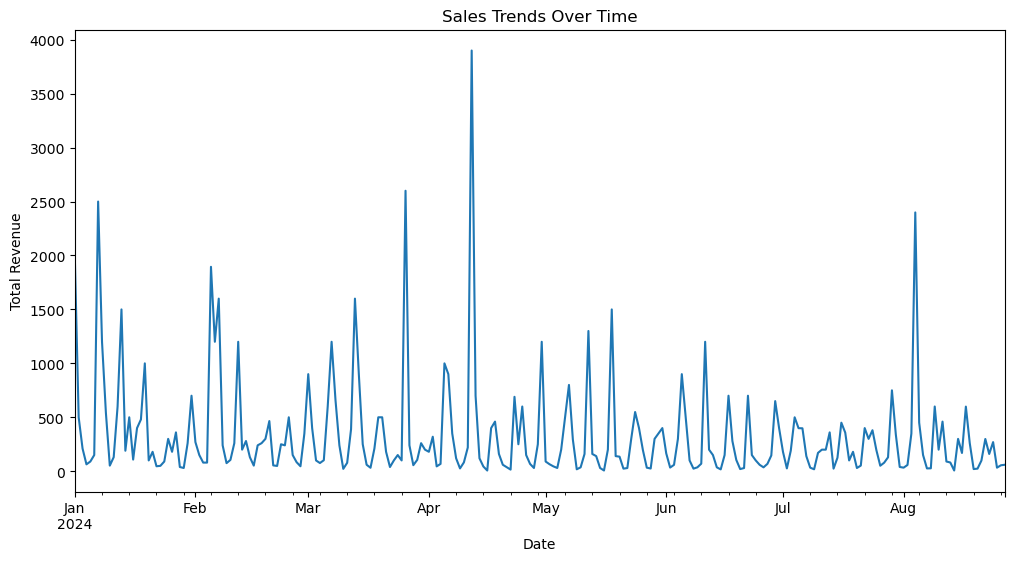

In [13]:
# 1. Analyze sales trends over time
sales_trend = df.groupby('Date')['Total Revenue'].sum()
plt.figure(figsize=(12, 6))
sales_trend.plot()
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()

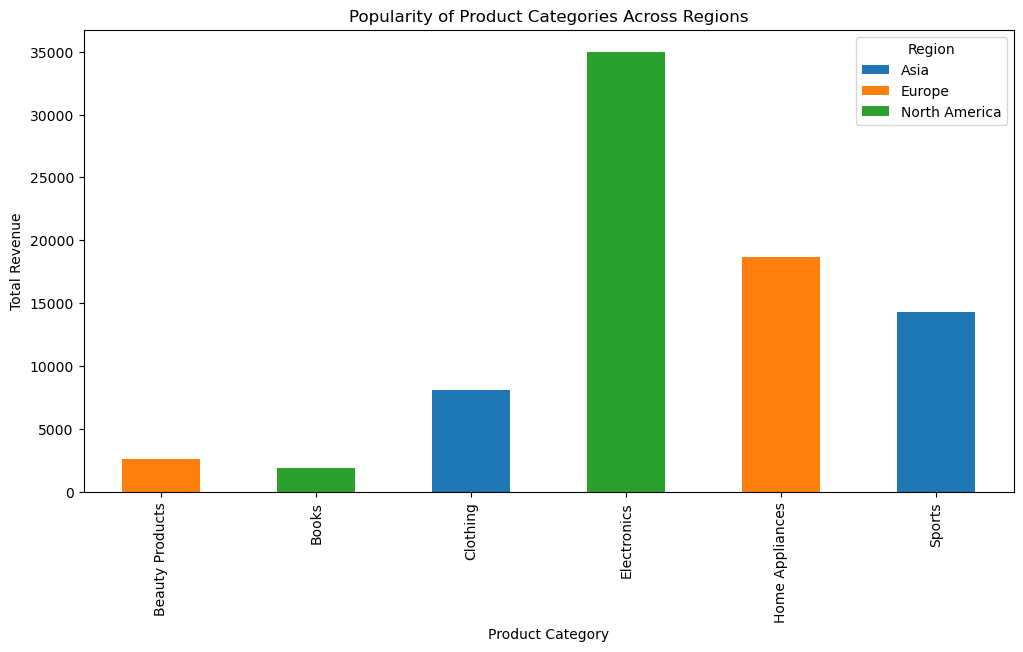

In [14]:
# 2. Explore the popularity of different product categories across regions
category_region = df.groupby(['Product Category', 'Region'])['Total Revenue'].sum().unstack()
category_region.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Popularity of Product Categories Across Regions')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.show()

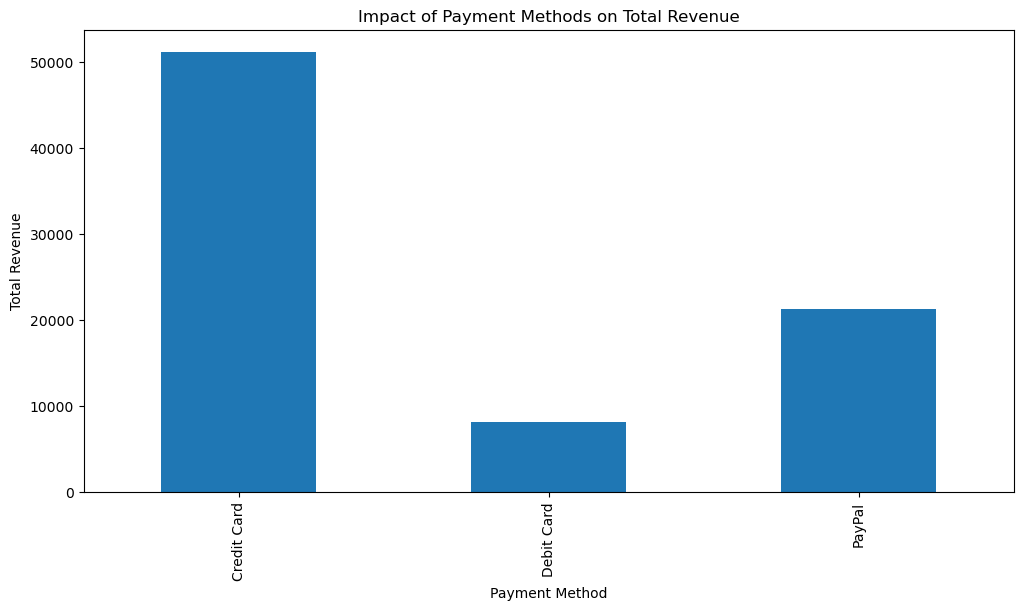

In [15]:
# 3. Investigate the impact of payment methods on sales volume or revenue
payment_method_sales = df.groupby('Payment Method')['Total Revenue'].sum()
payment_method_sales.plot(kind='bar', figsize=(12, 6))
plt.title('Impact of Payment Methods on Total Revenue')
plt.xlabel('Payment Method')
plt.ylabel('Total Revenue')
plt.show()

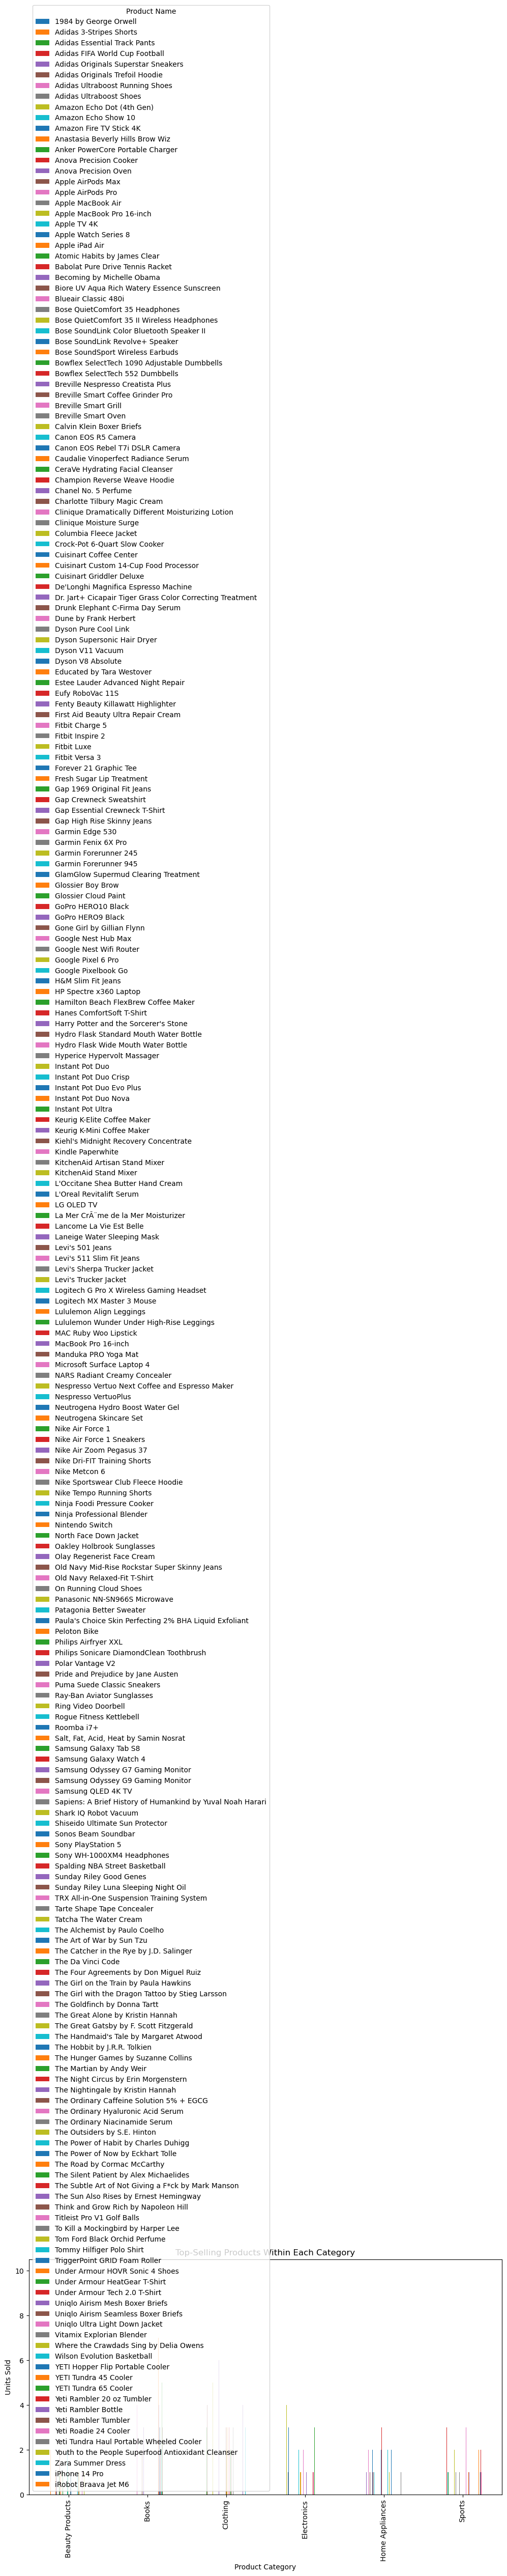

In [16]:
# 4. Identify top-selling products within each category
top_selling_products = df.groupby(['Product Category', 'Product Name'])['Units Sold'].sum().unstack().fillna(0)
top_selling_products = top_selling_products.apply(lambda x: x.sort_values(ascending=False).head(1))
top_selling_products.plot(kind='bar', figsize=(12, 6))
plt.title('Top-Selling Products Within Each Category')
plt.xlabel('Product Category')
plt.ylabel('Units Sold')
plt.show()

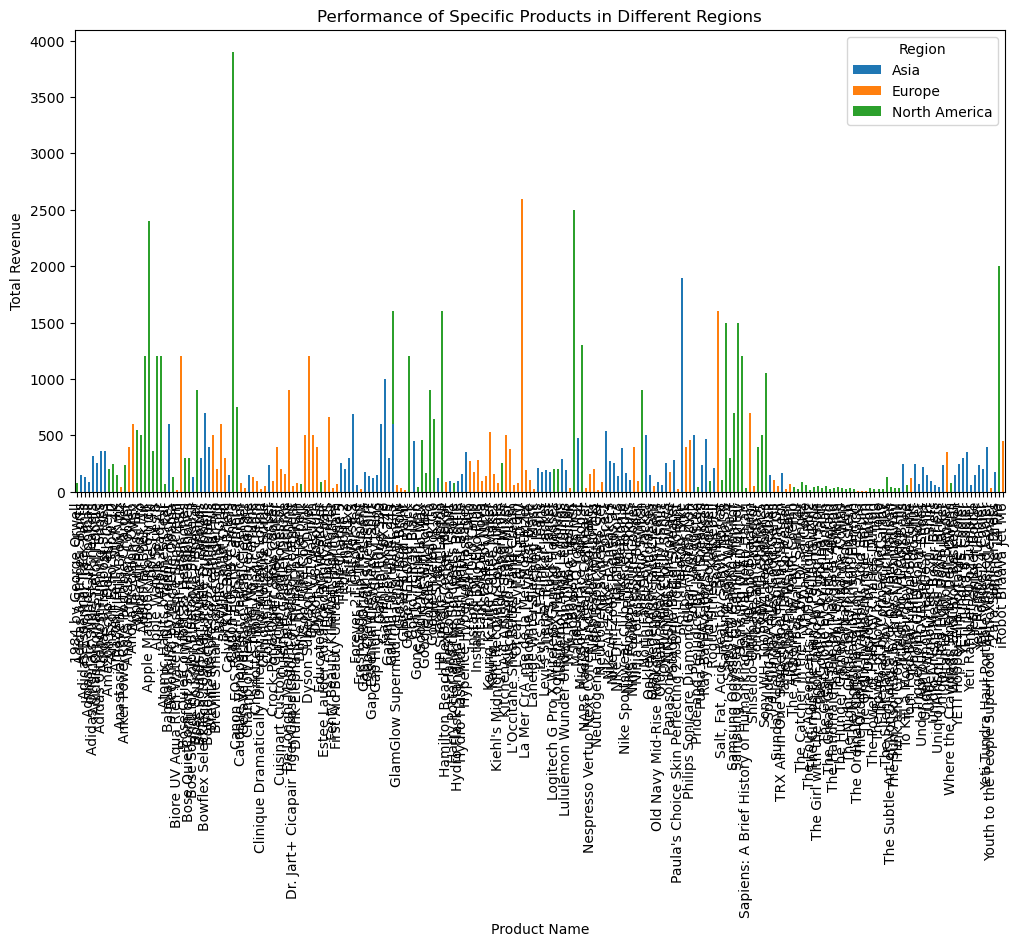

In [17]:
# 5. Evaluate the performance of specific products or categories in different regions
product_region_performance = df.groupby(['Product Name', 'Region'])['Total Revenue'].sum().unstack().fillna(0)
product_region_performance.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Performance of Specific Products in Different Regions')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.show()

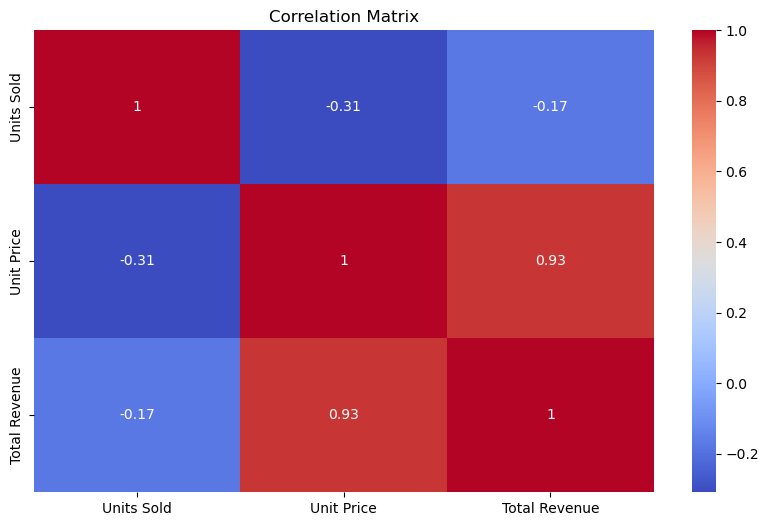

In [18]:
# Correlation Analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Units Sold', 'Unit Price', 'Total Revenue']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

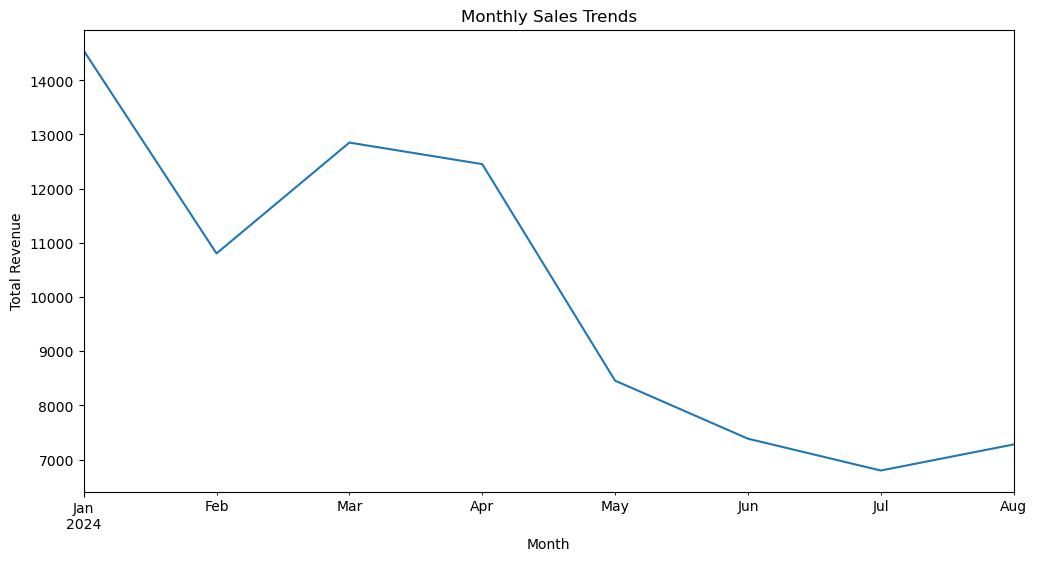

In [19]:
# Monthly Sales Trends
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales_trend = df.groupby('Month')['Total Revenue'].sum()
plt.figure(figsize=(12, 6))
monthly_sales_trend.plot()
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

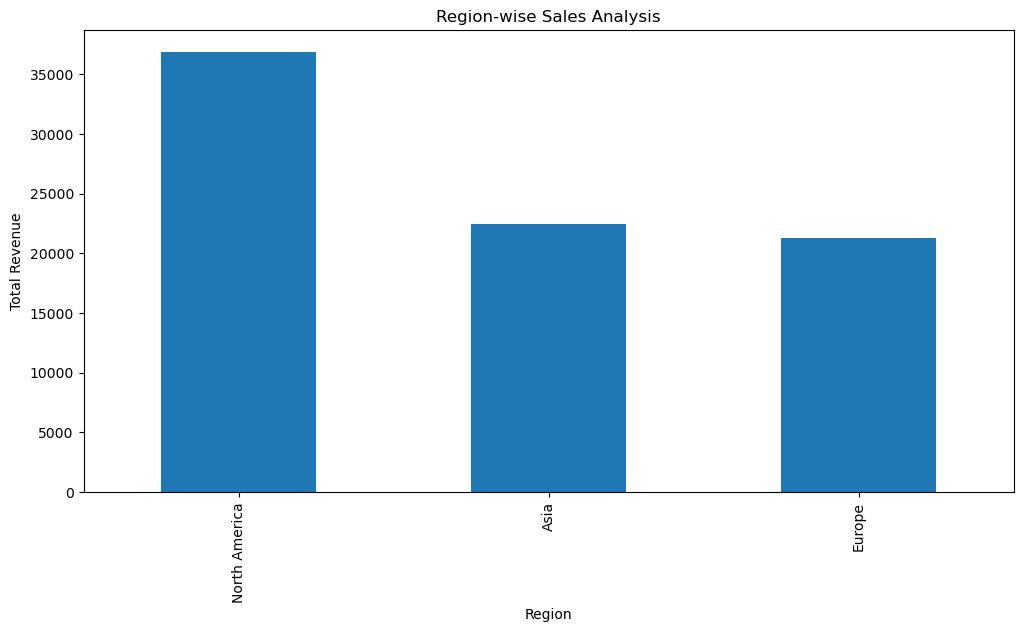

In [20]:
# Region-wise Analysis
region_sales = df.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
region_sales.plot(kind='bar')
plt.title('Region-wise Sales Analysis')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.show()

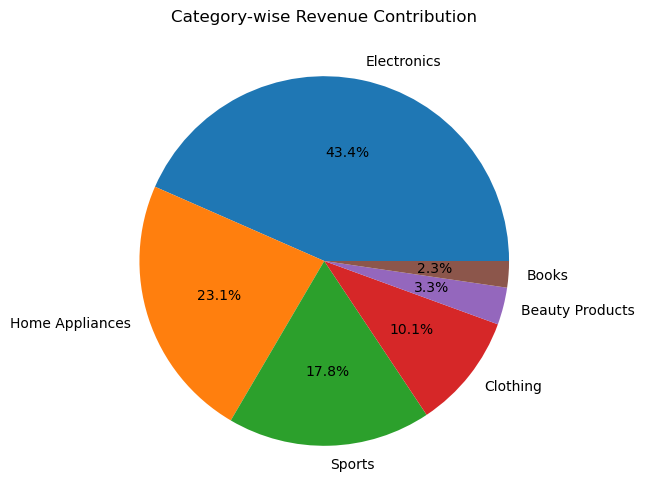

In [21]:
# Category-wise Revenue Contribution
category_revenue = df.groupby('Product Category')['Total Revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
category_revenue.plot(kind='pie', autopct='%1.1f%%')
plt.title('Category-wise Revenue Contribution')
plt.ylabel('')
plt.show()

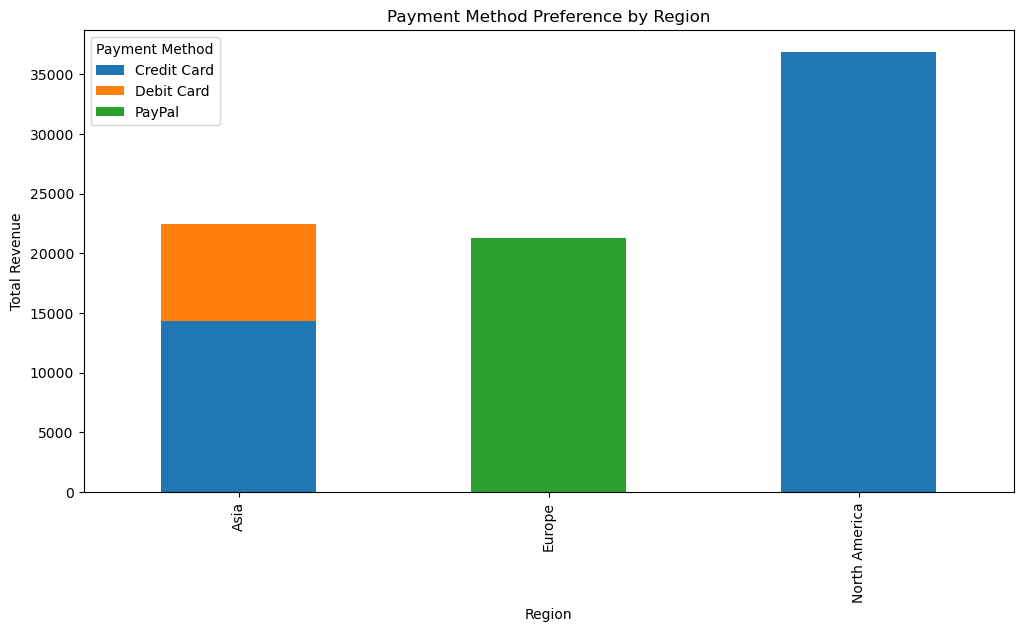

In [22]:
# Payment Method Preference by Region
payment_method_region = df.groupby(['Region', 'Payment Method'])['Total Revenue'].sum().unstack().fillna(0)
payment_method_region.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Payment Method Preference by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.show()

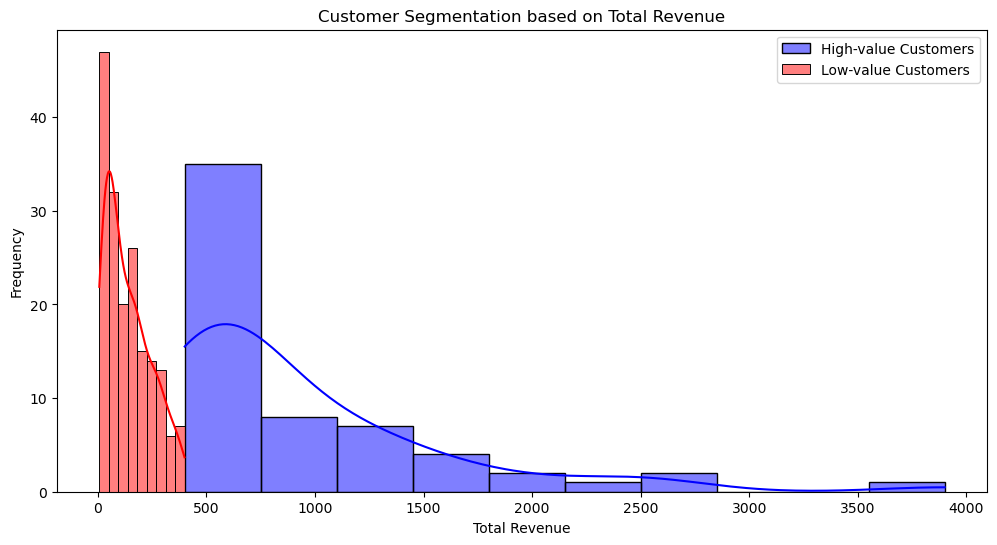

In [23]:
# Customer Segmentation (Example: High-value vs. Low-value customers)
high_value_customers = df[df['Total Revenue'] > df['Total Revenue'].quantile(0.75)]
low_value_customers = df[df['Total Revenue'] <= df['Total Revenue'].quantile(0.75)]

plt.figure(figsize=(12, 6))
sns.histplot(high_value_customers['Total Revenue'], kde=True, color='blue', label='High-value Customers')
sns.histplot(low_value_customers['Total Revenue'], kde=True, color='red', label='Low-value Customers')
plt.title('Customer Segmentation based on Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Mean Squared Error: 20329.786733924273


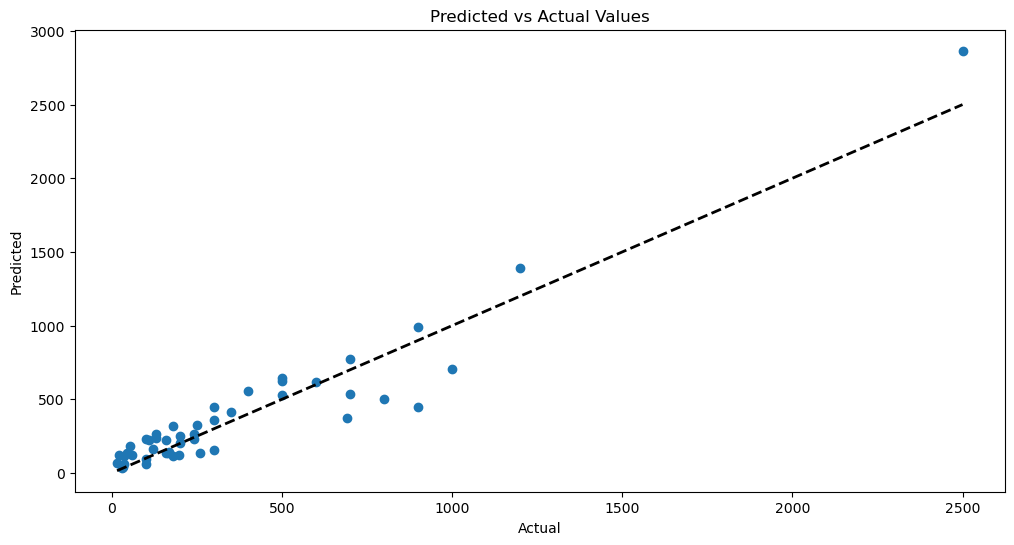

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare data for predictive analysis
df['Month_Num'] = df['Date'].dt.month
X = df[['Month_Num', 'Units Sold', 'Unit Price']]
y = df['Total Revenue']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Values')
plt.show()